In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

### Sums of Squares of Standard Normals ###
As we have seen, the square of a standard normal variable has the gamma $(1/2, 1/2)$ distribution, also known as the chi-squared distribution with 1 degree of freedom.

This section consists of applications of a fundamental fact about sums of independent gamma random variables, to be proved in the next chapter along with the corresponding fact about normal variables.

#### Sums of Independent Gamma Variables with the Same Rate ###
If $X$ has the gamma $(r, \lambda)$ distribution and $Y$ independent of $X$ has the gamma $(s, \lambda)$ distribution, then $X+Y$ has the gamma $(r+s, \lambda)$ distribution.

Note that for the result to apply, the rate parameter has to be the same for $X$ and $Y$. The rate parameter turns out to be the same for $X+Y$ as well, and the shape parameters add up.

Let's test out this result by simulation just as we did with the sums of normals. The first three lines in the cell below set the values of $\lambda$, $r$, and $s$. The rest simulates 10000 values of $X+Y$ and plots the gamma $(r+s, \lambda)$ density over the simulated values.

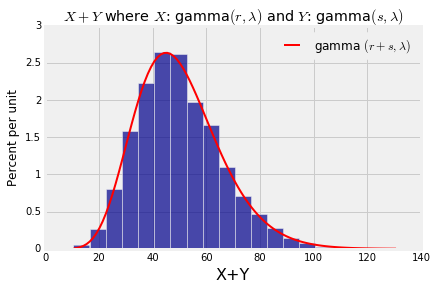

In [17]:
# Change these three parameters as you wish.
lam = 1/5
r = 3
s = 7

# Leave the rest of the code alone.
x = stats.gamma.rvs(r, scale=1/lam, size=10000)
y = stats.gamma.rvs(s, scale=1/lam, size=10000)
w = x+y
Table().with_column('X+Y', w).hist(bins=20)
t = np.arange(min(w), max(w)+0.1, (max(w) - min(w))/100)
dens = stats.gamma.pdf(t, r+s, scale=1/lam)
plt.plot(t, dens, color='red', lw=2, label='gamma $(r+s, \lambda)$')
plt.legend()
plt.title('$X+Y$ where $X$: gamma$(r, \lambda)$ and $Y$: gamma$(s, \lambda)$');

### Chi-Squared $(n)$ from Chi-Squared $(1)$ ###
Let $Z_1, Z_2, \ldots, Z_n$ be i.i.d. standard normal variables. We know that $Z_1^2, Z_2^2, \ldots, Z_n^2$ are i.i.d. chi-squared $(1)$ variables, that is, each of them has the gamma $(1/2, 1/2)$ distribution. 

Therefore $Z_1^2 + Z_2^2$ is a gamma $(1, 1/2)$ variable. That's the same distribution as exponential $(1/2)$, as you showed in exercises. This explains why the sum of squares of two i.i.d. standard normal variables has the exponential $(1/2)$ distribution.

Notice that the distribution of $Z_1^2 + Z_2^2$ has three equivalent names: gamma $(1, 1/2)$, chi-squared $(2)$, and exponential $(1/2)$.

By induction, $Z_1^2 + Z_2^2 + \cdots + Z_n^2$ has the gamma $(n/2, 1/2)$ distribution, that is, the chi-squared distribution with $n$ degrees of freedom.

### Chi-Squared Test for "Goodness of Fit" ###
Recall the Alameda County jury selection example from Data 8. There were $c=5$ categories of jurors. In the language of Prob140, for each $i$ the eligible population proportion in Category $i$ was a known value $p_i$, with $\sum_{i=1}^c p_i = 1$. 

The jurors on the panels were a sample of size $n$ from the eligible population. The question was whether sample looked as if it had been drawn at random.

In Data 8 we used total variation distance as our test statistic:
$$
TVD_{obs} = \frac{1}{2} \sum_{i=1}^c \lvert p_i^* - p_i \rvert
$$
where for each $i$, $p_i^*$ was the observed proportion in Category $i$.

We comapared this observed test statistic to values of the statistic simulated under the null hypothesis of randomness:

$$
TVD_{null} = \frac{1}{2} \sum_{i=1}^c \lvert \hat{p}_i - p_i \rvert
$$
where $\hat{p}_i$ was the proportion in Category $i$ in a random sample of size $n$.

Here we will examine the classical test of the same null hypothesis of randomness. Under the null, the expected count in Category $i$ is $np_i$. Let the observed count be $N_i$, with $\sum_{i=1}^c N_i = n$, the total sample size. The *chi-squared test statistic* is defined as

$$
\chi^2 ~ = ~ \sum_{categories} \frac{(\text{observed count - expected count})^2}{\text{expected count}} ~ = ~ \sum_{i=1}^c \frac{(N_i - np_i)^2}{np_i}
$$

Under the null hypothesis, the joint distribution of $(N_1, N_2, \ldots, N_c)$ is multinomial with parameters $n$ and $p_1, p_2, \ldots, p_c$.

From this it can be shown that under the null hypothesis, the distribution of $\chi^2$ is approximately chi-squared with $c-1$ degrees of freedom. So you can compare the observed value of $\chi^2$ with the chi-squared $(c-1)$ distribution to determine a $p$-value. You will do that as part of your next lab.

Here we will simply indicate how the $\chi^2$ statistic as defined above has an approximate chi-squared $c-1$ distribution, by examining the simple case where there are only two categories. This is a binomial setting, like the Swain vs. Alabama example in Data 8, where you are counting how many 1's there are in your sample, the rest being 0's.

Let's set up some notation and make a few observations.

- Call the two categories 0 and 1. 
- Under the null hypothesis, let the probability of 1 be $p$ and hence let the probability of 0 be $q = 1-p$.
- Then under the null, the distribution of $N_0$ is binomial $(n, q)$ and the distribution of $N_1$ is binomial $(n, p)$.

The chi-squared test statistic is
$$
\chi^2 ~ = ~ \frac{(N_0 - nq)^2}{nq} + \frac{(N_1 - np)^2}{np}
$$

Observe that
$$
N_0 - nq ~ = ~ (n - N_1) - nq ~ = ~ np - N_1
$$

So the chi-squared statistic becomes

\begin{align*}
\chi^2 &= \frac{(N_0 - nq)^2}{nq} + \frac{(N_1 - np)^2}{np} \\ \\
&= \frac{(N_1 - np)^2}{n} \big{(} \frac{1}{q} + \frac{1}{p} \big{)} \\ \\
&= \frac{(N_1 - np)^2}{n} \big{(} \frac{p+q}{pq} \big{)} \\ \\
&= \frac{(N_1 - np)^2}{npq} \\ \\
&= \Big{(} \frac{N_1 - np}{\sqrt{npq}} \Big{)}^2
\end{align*}

Under the null hypothesis, the quantity inside the square is a standardized binomial random variable. If the sample size $n$ is large, its distribution is approximately standard normal. 

Therefore if the sample size is large, the distribution of the $\chi^2$ statistic is approximately chi-squared with 1 degree of freedom.

If the number of categories $c$ is greater than 2, a more complex calculation is required. We won't go into it in this course. Just note that the array of counts $(N_1, N_2, \ldots, N_c)$ in the $c$ categories is a $c-1$ dimensional vector as the sum of all the counts has to be the sample size which is fixed in advance. This motivates the terminology: there are only $c-1$ "degrees of freedom".

#### Notes. ####
- This test is called the *chi-squared test for goodness of fit*. It is a test of how well the model of random draws from a known categorical distribution fits the data.
- The test requires a large sample, because it relies on the normal approximation to multinomial counts. By contrast, the Data 8 test that uses the TVD works for small samples too.
- Whether you use the chi-squared statistic or the TVD, you will have trouble with accuracy if the population proportion in any category happens to be small. You are unlikely to get an adequate proportion of sampled individuals in that category.